# Final Project Part 2

Cole Lewis

In [1]:
import numpy as np
import sep

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10.0,8.0]

In [3]:
f105w_data = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")[0].data
f105w_data = f105w_data.byteswap().newbyteorder()

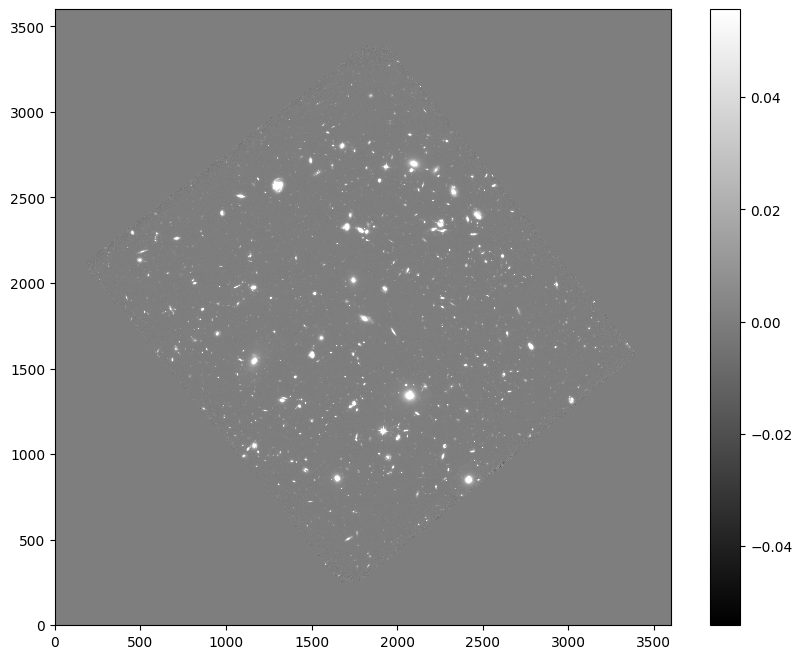

In [4]:
# show the image
m, s = np.mean(f105w_data), np.std(f105w_data)
plt.imshow(f105w_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("f105_data.png", bbox_inches="tight")

In [5]:
f105w_bkg = sep.Background(f105w_data)
print(f105w_bkg.globalback)
print(f105w_bkg.globalrms)
f105w_bkg_image = f105w_bkg.back()

0.0
0.0005398219218477607


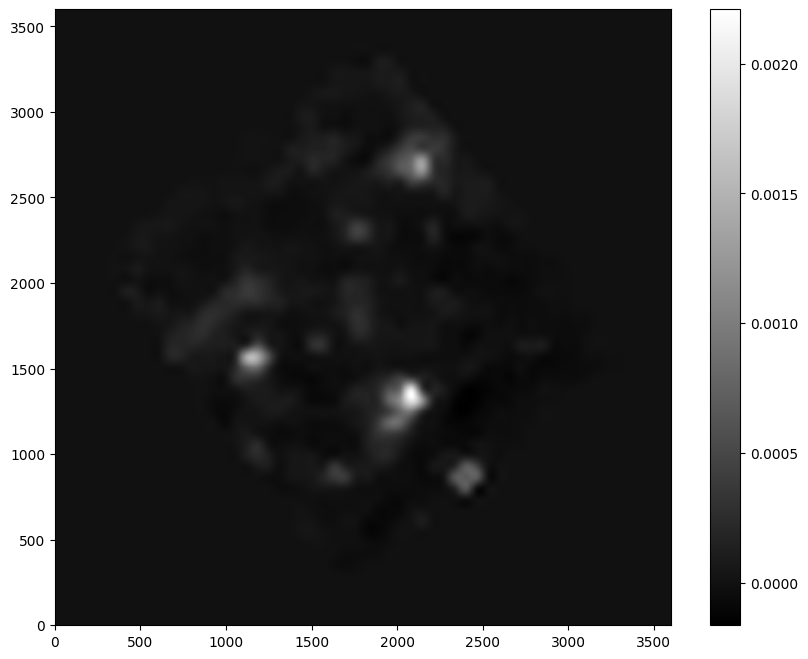

In [6]:
plt.imshow(f105w_bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("f105_background.png", bbox_inches="tight")

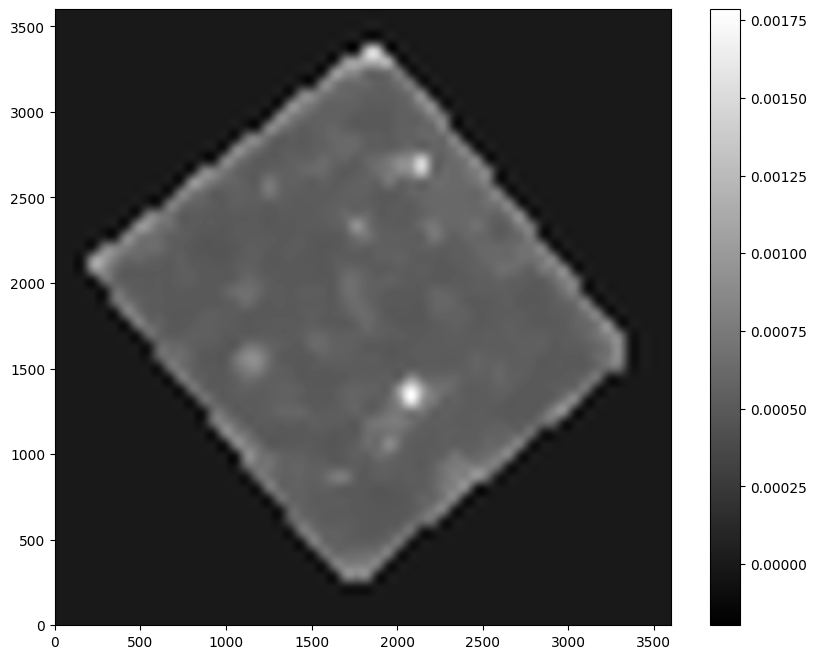

In [7]:
f105w_bkg_rms = f105w_bkg.rms()
plt.imshow(f105w_bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("f105w_background_noise.png", bbox_inches="tight")

In [8]:
f105w_data_sub = f105w_data - f105w_bkg
f105w_objects = sep.extract(f105w_data_sub, 1.5, err=f105w_bkg.globalrms)
print(len(f105w_objects))

8640


There are 8640 sources

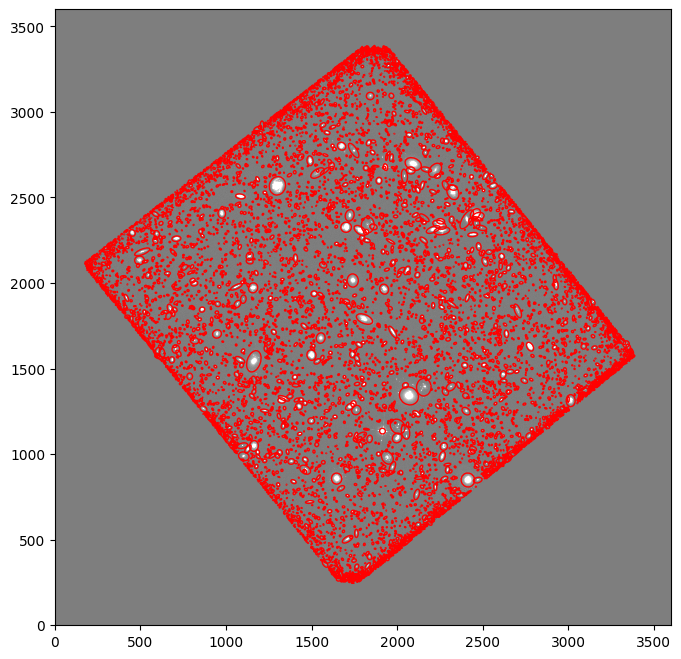

In [9]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(f105w_data_sub), np.std(f105w_data_sub)
im = ax.imshow(f105w_data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(f105w_objects)):
    e = Ellipse(xy=(f105w_objects['x'][i], f105w_objects['y'][i]),
                width=6*f105w_objects['a'][i],
                height=6*f105w_objects['b'][i],
                angle=f105w_objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
fig.savefig("f105w_objects.png", bbox_inches="tight")

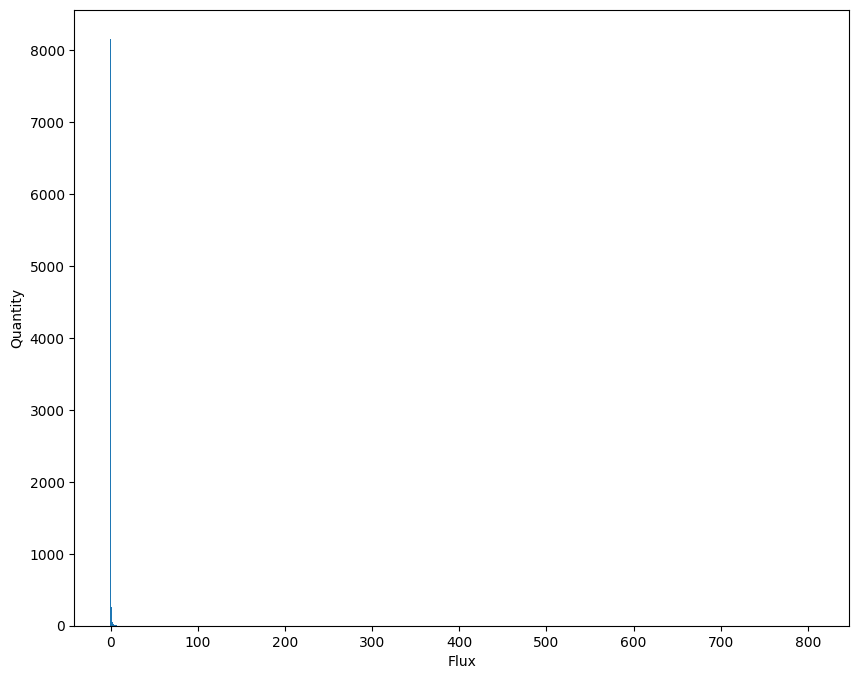

In [10]:
f105w_flux, f105w_fluxerr, f105w_flag = sep.sum_circle(f105w_data_sub, f105w_objects['x'], f105w_objects['y'], 3.0, err=f105w_bkg.globalrms, gain=1.0)

fig, ax = plt.subplots()
f105w_hist = ax.hist(f105w_flux, bins = 1000)
ax.set_xlabel("Flux")
ax.set_ylabel("Quantity")
fig.savefig("f105w_histogram", bbox_inches="tight")

In [11]:
f105w_flux_mean = np.mean(f105w_flux)
f105w_flux_median = np.median(f105w_flux)
f105w_flux_std = np.std(f105w_flux)
print(f"Mean flux: {f105w_flux_mean}, Median flux: {f105w_flux_median}, Standard Deviation of fluxes: {f105w_flux_std}")

Mean flux: 0.36185728037707154, Median flux: 0.030960064365426664, Standard Deviation of fluxes: 9.243528029706706


In [12]:
largest_outlier_i = np.argmax(f105w_flux) #argmax gets the index of the largest element of the array, in this case the index of the largest outlier
print(f"Largest outlier: {f105w_flux[largest_outlier_i]}")
print(f"Largest outlier location: (x: {f105w_objects['x'][largest_outlier_i]}, y: {f105w_objects['y'][largest_outlier_i]})")

Largest outlier: 807.2972835731507
Largest outlier location: (x: 1914.2549094883857, y: 1134.3164850742164)


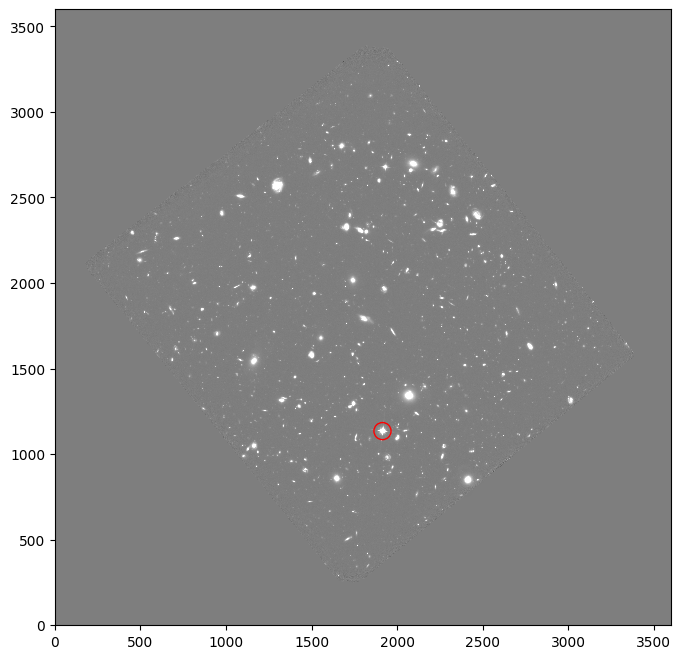

In [13]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(f105w_data_sub), np.std(f105w_data_sub)
im = ax.imshow(f105w_data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
e = Ellipse(xy=(f105w_objects['x'][largest_outlier_i], f105w_objects['y'][largest_outlier_i]),
            width=100,
            height=100)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)
fig.savefig("f105w_largest_outlier.png", bbox_inches="tight")

In [14]:
print(f"The outlier is {(f105w_flux[largest_outlier_i]-f105w_flux_mean)/f105w_flux_std} standard deviations from the mean.")

The outlier is 87.29734184820526 standard deviations from the mean.


In [15]:
f125w_data = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")[0].data
f125w_data = f125w_data.byteswap().newbyteorder()
f160w_data = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")[0].data
f160w_data = f160w_data.byteswap().newbyteorder()

In [16]:
rgb = np.zeros((f160w_data.shape[0], f160w_data.shape[1], 3))
rgb[:,:,0] = f160w_data
rgb[:,:,1] = f125w_data
rgb[:,:,2] = f105w_data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


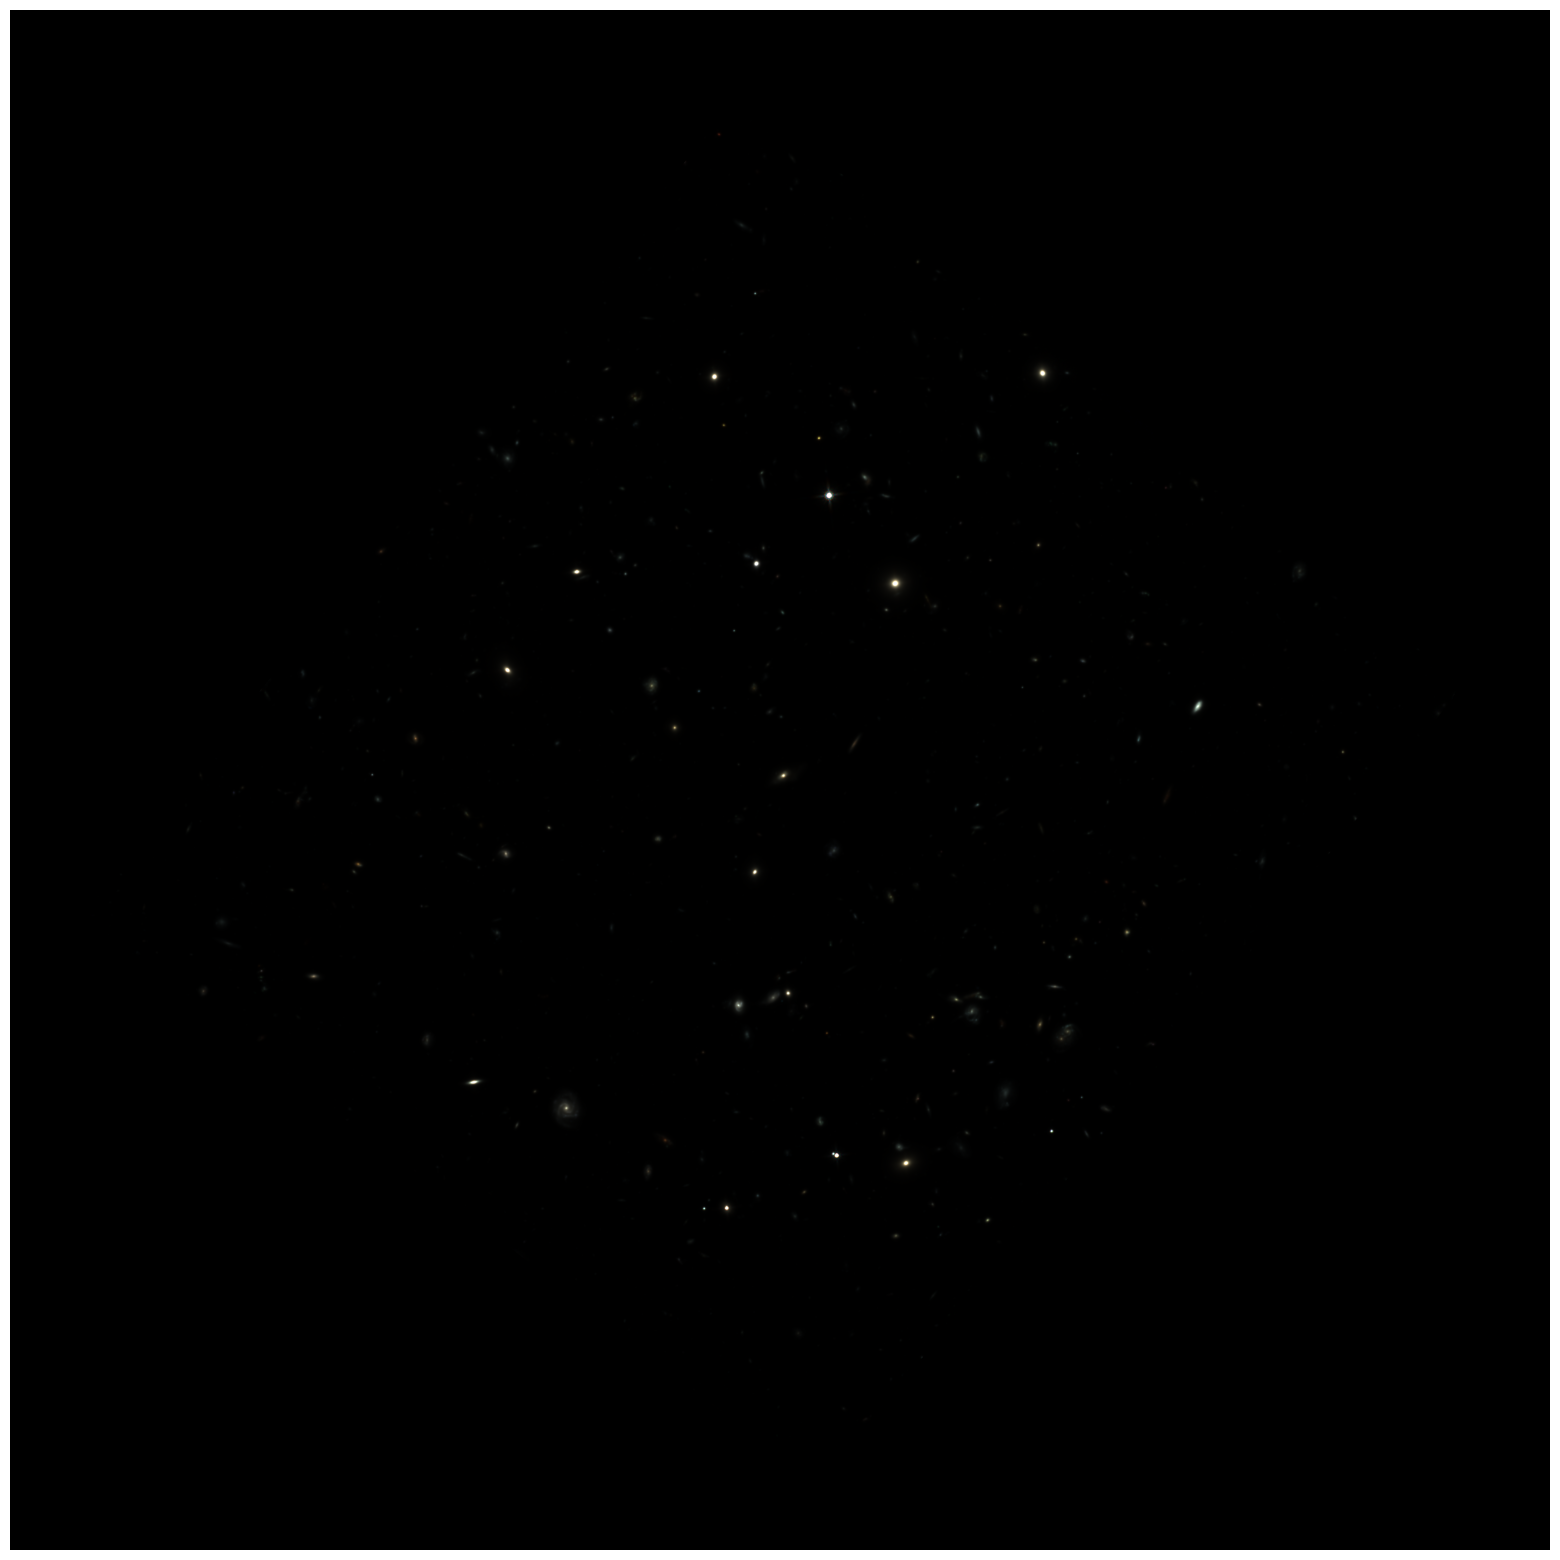

In [17]:
f, ax = plt.subplots(1, 1, figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('false_color_UDF.png', bbox_inches='tight')